Xwres prin to katharisma:  642
Xwres meta to katharisma:  127


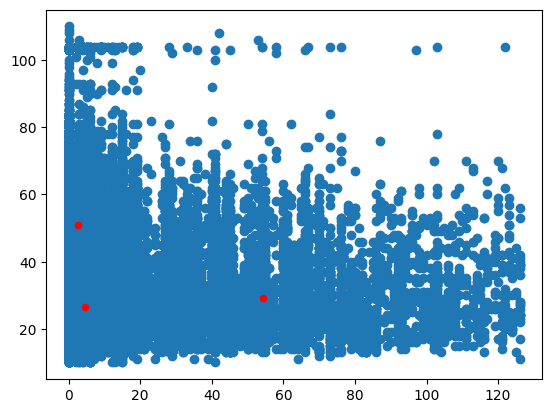

<bound method NDFrame.head of            uid        isbn  rating
54       12923  0440234743      10
64       31299  0440234743      10
129     131681  0440234743       9
135     136707  0440234743       6
228      27624  0452264464       8
...        ...         ...     ...
383328  275184  1562614886       7
383767  278209  0345392698       7
383781  278330  0898861411       5
383835  278621  1550390961       8
383844  278713  0670528951       8

[5612 rows x 3 columns]>


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as exp

data = pd.read_csv('BX-Users.csv')
ratings = pd.read_csv('BX-Book-Ratings.csv')


#---katharismos tou column location gia na meinei mono h xwra---
for x in range(len(data)):
    my_str = data.loc[x,"location"]
    new_val= my_str[my_str.rfind(','):]
    data.loc[x,"location"] = new_val[1:len(new_val)]
    # clear people above 110 age
    if data.loc[x,"age"] >110 or data.loc[x,"age"] <10:
        data.drop(x,axis=0,inplace=True)

#---katharismos twn countries kathws uphrxan mesa mi uparktes xwres.---
unique_countries = data['location'].unique()
#arxikos arithmos xwrwn
print("Xwres prin to katharisma: ", len(unique_countries))

#---diagrafi twn xwrwn pou emfanizontai ligoteres apo 15 fores kathws opws eidame den einai egkyres
for country in unique_countries:  
    if len(data[data['location'] == country]) < 15 :
        #print(country, "with entries ", len(data[data['location'] == country]), "DROPPED")
        data.drop(data.loc[data['location'] == country].index, inplace = True) 

unique_countries = data['location'].unique()
print("Xwres meta to katharisma: ", len(unique_countries))


#vazoume gia kathe xwra ena monadiko arithmo gia na perasei sto model
for country in unique_countries:
    #print(country, np.where(unique_countries == country)[0][0])
    data['location'] = data['location'].replace(country, np.where(unique_countries == country)[0][0])

#dropparoume tis Nan times gia na mporei na mpei sto kmean model
data = data.dropna()


X = np.array(data.loc[:,['location', 'age']])


kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)

model = kmeans.fit_predict(X)

# to model einai ta labels gia to pou anikei o kathe user
#print(len(model))


plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=20,     # Set centroid size
            c='red')  # Set centroid color
plt.show()
 

# enallagh pali se xwres anti gia arithmous gia na proxwrisoume se diaxwrismo
for country in unique_countries:
    data['location'] = data['location'].replace(np.where(unique_countries == country)[0][0], country) 


data = data.reset_index(drop=True)

#eisagoume neo column sta data me to se poio cluster anikei o kahte user
data['cluster'] = model

# edw ksexwrizoyme tous users me vasi to cluster pou tous anatehike
# isws xreiastei reset index
clust_1 = data[data['cluster'] == 0]
clust_2 = data[data['cluster'] == 1]
clust_3 = data[data['cluster'] == 2]

#print(data.head)

zero_ratings = ratings[ratings['rating'] == 0]
zero_ratings = zero_ratings.reset_index(drop=True)
#zero_ratings.head


non_zero_ratings = ratings[ratings['rating'] != 0]
non_zero_ratings = non_zero_ratings.reset_index(drop=True)


clust_1_users_ratings = pd.DataFrame()
clust_2_users_ratings = pd.DataFrame()
clust_3_users_ratings = pd.DataFrame()

#Kathe dataframe exei tous users tou kathe cluster kai kathe vivlio pou exoun vathmologisei
for x in range(len(non_zero_ratings)):
    if non_zero_ratings.iloc[x]['uid'] in clust_1['uid'].values:
        clust_1_users_ratings = pd.concat([clust_1_users_ratings, non_zero_ratings.iloc[[x]]])

for x in range(len(non_zero_ratings)):
    if non_zero_ratings.iloc[x]['uid'] in clust_2['uid'].values:
        clust_2_users_ratings = pd.concat([clust_2_users_ratings, non_zero_ratings.iloc[[x]]])

for x in range(len(non_zero_ratings)):
    if non_zero_ratings.iloc[x]['uid'] in clust_3['uid'].values:
        clust_3_users_ratings = pd.concat([clust_3_users_ratings, non_zero_ratings.iloc[[x]]])



print(clust_1_users_ratings.head)


In [4]:
books_rat_clust1 = np.empty((0, 2), int)
books_rat_clust2 = np.empty((0, 2), int)
books_rat_clust3 = np.empty((0, 2), int)



for book in range(len(zero_ratings)):
    
    # etsi pairno me tin seira isbn apo ta zero
    x = zero_ratings.iloc[book]['isbn']

    # elegxei an yparxei to isbn sta non zero
    if x in clust_1_users_ratings['isbn'].values and (x in books_rat_clust1) == False:
        # poses fores uparxei auto to isbn sta non zero
        #clust_1_users_ratings['isbn'].value_counts()[x]
        
        # edw vazo se ena neo dataframe oles tis vathmologies twn allwn users gia to biblio
        ongoing_book_rating=clust_1_users_ratings[clust_1_users_ratings['isbn'] == x]
        # vrisko tin mesi timi giauto to vivlio gia tous user pou to exoun vathmologisei
        mean=ongoing_book_rating['rating'].mean()
        # vazoume sto array to isbn kai dipla ton meso oro twn vathmologiwn
        books_rat_clust1=np.append(books_rat_clust1, np.array([[x, mean]]), axis=0)

    if x in clust_2_users_ratings['isbn'].values and (x in books_rat_clust2) == False:
        
        # edw vazo se ena neo dataframe oles tis vathmologies twn allwn users gia to biblio
        ongoing_book_rating=clust_2_users_ratings[clust_2_users_ratings['isbn'] == x]
        # vrisko tin mesi timi giauto to vivlio gia tous user pou to exoun vathmologisei
        mean=ongoing_book_rating['rating'].mean()
        # vazoume sto array to isbn kai dipla ton meso oro twn vathmologiwn
        books_rat_clust2=np.append(books_rat_clust2, np.array([[x, mean]]), axis=0)

    if x in clust_3_users_ratings['isbn'].values and (x in books_rat_clust3) == False:
      
        # edw vazo se ena neo dataframe oles tis vathmologies twn allwn users gia to biblio
        ongoing_book_rating=clust_3_users_ratings[clust_3_users_ratings['isbn'] == x]
        # vrisko tin mesi timi giauto to vivlio gia tous user pou to exoun vathmologisei
        mean=ongoing_book_rating['rating'].mean()
        # vazoume sto array to isbn kai dipla ton meso oro twn vathmologiwn
        books_rat_clust3=np.append(books_rat_clust3, np.array([[x, mean]]), axis=0)        



/var/folders/gm/dk17bx292yz59cjk3jzxtcz40000gn/T/ipykernel_27205/457482131.py:24: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if x in clust_2_users_ratings['isbn'].values and (x in books_rat_clust2) == False:
/var/folders/gm/dk17bx292yz59cjk3jzxtcz40000gn/T/ipykernel_27205/457482131.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if x in clust_1_users_ratings['isbn'].values and (x in books_rat_clust1) == False:
/var/folders/gm/dk17bx292yz59cjk3jzxtcz40000gn/T/ipykernel_27205/457482131.py:33: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if x in clust_3_users_ratings['isbn'].values and (x in books_rat_clust3) == False:


KeyboardInterrupt: 

In [ ]:
print(books_rat_clust1)
print(len(books_rat_clust2))
print(len(books_rat_clust3))


x = zero_ratings.iloc[3]['isbn']
print((x in books_rat_clust3) == False)




5612
7649
268
True
